**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [ ]:
# Loading the csv data to pandas data frame
gold_data= pd.read_csv('/content/gld_price_data.csv') # here in our pd.read_csv we have given the url of our file, to import the dataset

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# nmbr of rows and colms
gold_data.shape

(2290, 6)

In [ ]:
# getting some more basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the numebr of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation in the dataset**

There are two types of correlation:
1. Positive correlation: One variable increase when the other variable increases (directly proportional)
2. Negative correlation: One value decreases if the other value increases (inversely proportional)

In [ ]:
# creating a variable named correlation
correlation = gold_data.corr()

<ipython-input-11-8303c29f9d6e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

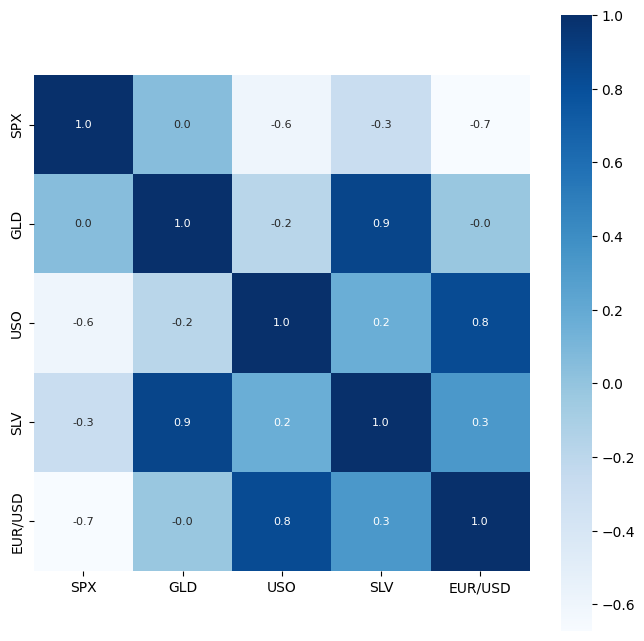

In [ ]:
# constructing a heaatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar= True, square= True, fmt= '.1f', annot= True, annot_kws= {'size': 8}, cmap= 'Blues')

In [ ]:
# correlation values for GLD (gold)
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-611ed6dc749a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color= 'green')


<Axes: xlabel='GLD', ylabel='Density'>

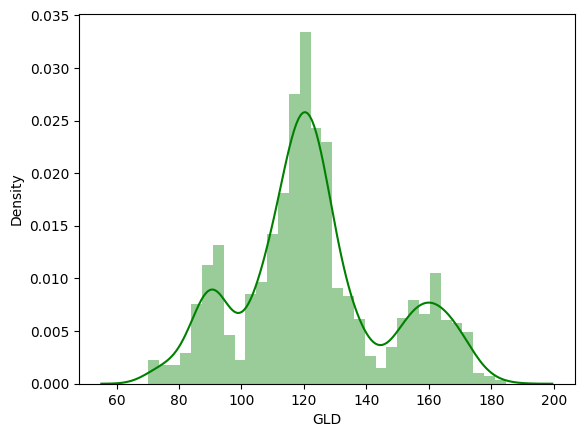

In [ ]:
# Checking the distribution of the gold price over the years
sns.distplot(gold_data['GLD'], color= 'green')

**Spliiting the features and target**

Features: other stocks, silver and dollar price etc.
Target: Gold price

In [ ]:
# Storing features in x
x= gold_data.drop(['Date', 'GLD'], axis= 1)   # we have removed Data and Gold price from our dataset and we are left with other columns..

# WHILE DROPPING COLMS WE MAKE OUR axis= 1 AND WHILE DROPPING ANY ROWS WE MAKE OUR axis= 0

# Storing gold price colm in y
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 2)

**Model Training**

Random Forest Regressor


In [ ]:
# creating a variable named regressor
regressor= RandomForestRegressor(n_estimators= 100)

In [ ]:
# TRAINING THE MODEL
regressor.fit(x_train, y_train)

RandomForestRegressor()

**Model Evaluation**

In [ ]:
# prediction on the basis of test data
test_data_prediction= regressor.predict(x_test)    # created a variable

In [ ]:
print(test_data_prediction)

[168.63569964  81.6989     116.18670004 127.6180004  120.64620108
 154.66639722 150.48509791 126.21990006 117.62819874 126.02290073
 116.81060087 171.27140107 142.19619909 167.9420985  115.38519987
 117.41760012 140.60070252 169.92650065 159.75890284 160.37889901
 155.14390023 125.02460031 176.19639886 157.56550325 125.24220016
  93.91789962  77.31280026 120.52169972 118.97989906 167.46279996
  88.17029993 125.17459999  91.08280046 117.68660039 121.11839939
 136.48940034 115.52740066 115.22320086 147.879399   107.04540107
 104.6789028   87.13239798 126.48270019 118.03789945 152.11379947
 119.66289978 108.35279998 107.98079856  93.25510055 127.08409772
  74.90460049 113.57969943 121.37200002 111.51509931 118.87169871
 120.79099964 158.54059979 167.55610165 146.93309673  85.87739885
  94.14730018  86.93199881  90.61760013 119.06130069 126.3509007
 127.55229983 169.18460041 122.2437993  117.61439869  98.51060025
 168.19240042 143.23939809 131.5149021  121.09700219 121.69679932
 119.824900

In [ ]:
# Compare predicted values with the actual values.. Here we will be using
# R Squared Error
error_score= metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.9893770767144077


**Compare the actual values and the predited values in a plot**

In [ ]:
# Converting our y_test into a list to avoid error while plotting it
y_test= list(y_test)

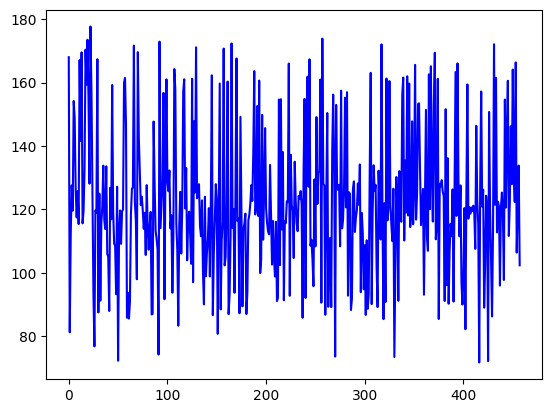

In [ ]:
plt.plot(y_test, color= "blue", label = "Actual Value")

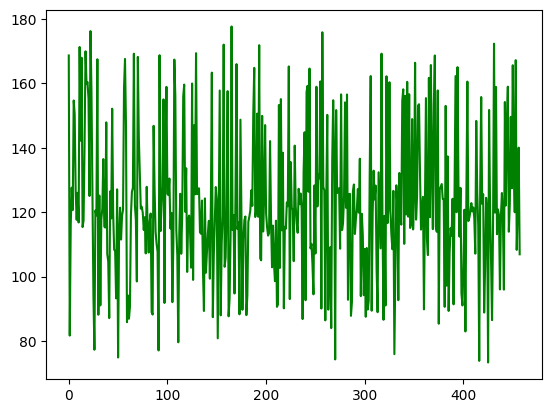

In [ ]:
plt.plot(test_data_prediction, color= "green", label= "Predicted Values")

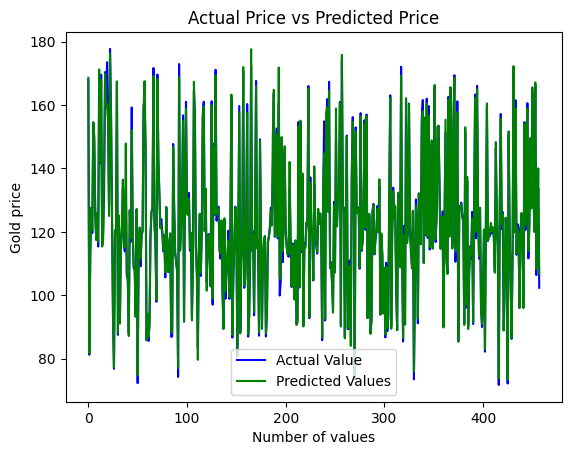

In [ ]:
plt.plot(y_test, color= "blue", label = "Actual Value")
plt.plot(test_data_prediction, color= "green", label= "Predicted Values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()